In [1]:
# trying to reload the module when I make a change on it
# changed the from pointnet_classification import * to this, to try to reload
# %load_ext autoreload
# %autoreload 2


import pointnet_classification
# import keras.utils

In [2]:
train_dataset, test_dataset, num_points, num_classes, classmap = pointnet_classification.locate_and_parse_dataset()
model = pointnet_classification.create_model(num_points, num_classes)



GPU usage is set to : False.
processing class: bed
class map:bed
processing class: monitor
class map:monitor
processing class: desk
class map:desk
processing class: chair
class map:chair
processing class: dresser
class map:dresser
processing class: toilet
class map:toilet
processing class: sofa
class map:sofa
processing class: table
class map:table
processing class: night_stand
class map:night_stand
processing class: bathtub
class map:bathtub


2023-07-06 00:04:06.794477: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-07-06 00:04:06.794690: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-07-06 00:04:06.794709: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-07-06 00:04:06.795642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-06 00:04:06.796537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 2048, 3)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 2048, 32)             128       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 2048, 32)             128       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 2048, 32)             0         ['batch_normalization[0

loading weights
weights loaded
1/1 [==============================] - 0s 289ms/step
starting to plot


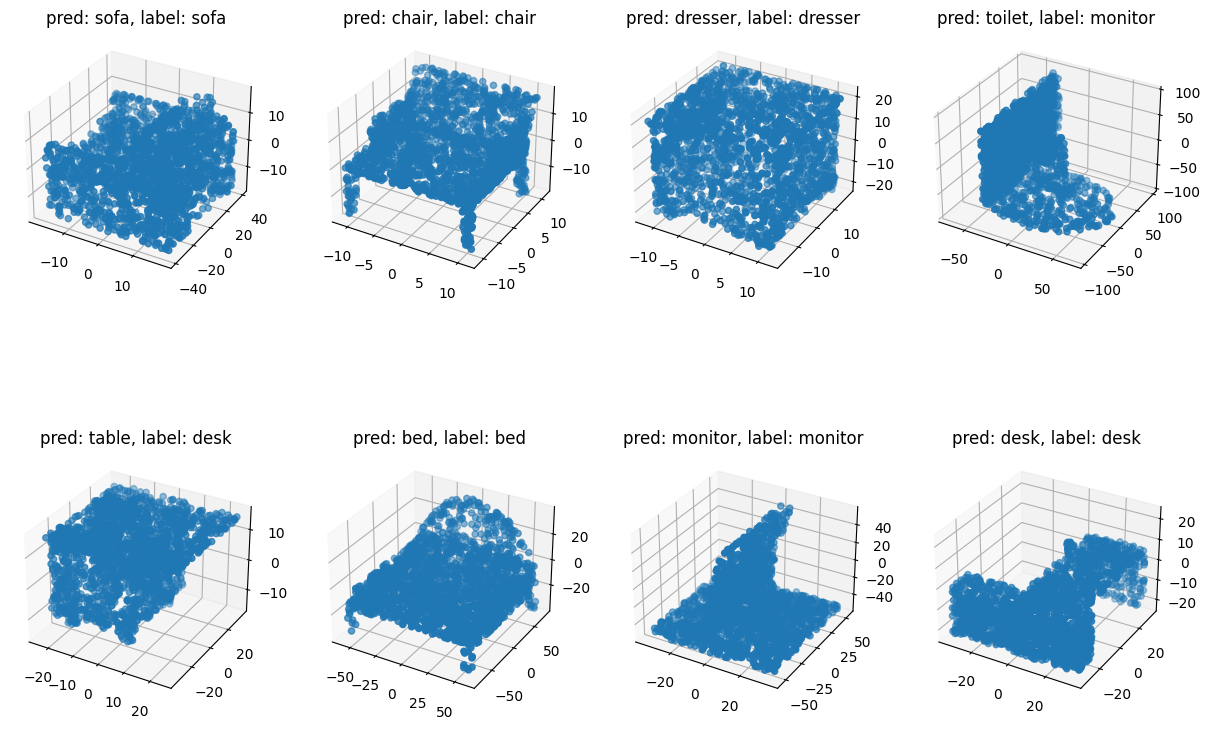

after plot


(<keras.src.engine.functional.Functional at 0x293366bf0>,
 {0: 'bed',
  1: 'monitor',
  2: 'desk',
  3: 'chair',
  4: 'dresser',
  5: 'toilet',
  6: 'sofa',
  7: 'table',
  8: 'night_stand',
  9: 'bathtub'})

In [32]:
# if we want to train the model
# history = train_model(train_dataset, test_dataset, model, epochs=1)
# plot_history(history)
#save_weights()

# if we want to use a saved model

print("loading weights")
model.load_weights('../../pointnet_network_config/weights/modelnet10_weights.h5')
print("weights loaded")
pointnet_classification.test_trained_model(test_dataset, model, classmap)





In [38]:
# from pyntcloud import PyntCloud
# my_point_cloud = PyntCloud.from_file("new-chair.pcd")
# my_point_cloud.plot()
#sampled_pc = my_point_cloud.get_sample('points_random', n=30000, as_PyntCloud=True)
#sampled_pc.plot()

import open3d as o3d
print("reading point file")
pcd = o3d.io.read_point_cloud("new-chair.pcd")
# o3d.visualization.draw_geometries([pcd])
                                  

reading point file


In [25]:
import numpy
from matplotlib import pyplot as plt


# plot points with predicted class and label
def print_points(pointcloud):
    print("starting to plot")
    print("type: " +  str(type(pointcloud)))
    points = numpy.asarray(pointcloud.points)
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    print(points.shape)
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    ax.view_init(elev=0.,azim=90.)
    # ax.set_zlim(-1.5, 1.5)
    # ax.set_xlim(-1.5, 2.5)
    # ax.set_ylim(-1.5, 1.5)
    #ax.set_axis_off()
    plt.show()
    print('after plot')

#print_points(pcd)


AxisAlignedBoundingBox: min: (0.5, -0.137555, -0.225762), max: (2.52072, 0.398751, 0.462451)
OrientedBoundingBox: center: (1.51036, 0.130598, 0.118345), extent: 2.02072, 0.536306, 0.688213)
after crop
starting to plot
type: <class 'open3d.cpu.pybind.geometry.PointCloud'>
(3832, 3)


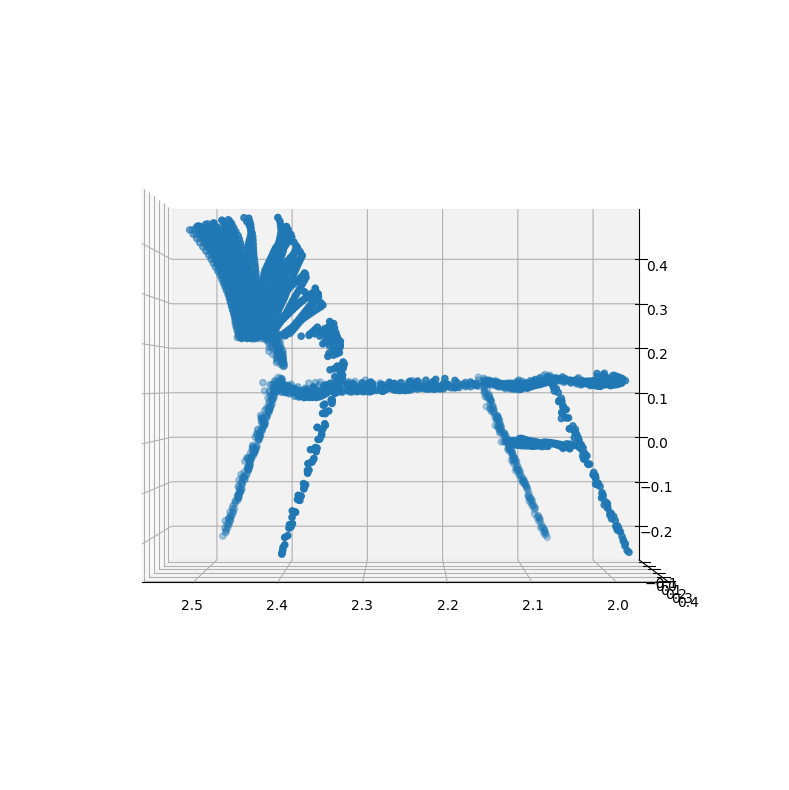

after plot


In [39]:
def get_cropping_bounding_box_from_pc(pcd: o3d.geometry.PointCloud):
    bb = pcd.get_axis_aligned_bounding_box()
    bb_limits = bb.get_box_points()
    bb_limits = numpy.asarray(bb_limits)
    # Adds offset to the X component so that the bounding box excludes the points
    bb_limits[bb_limits == 0.0] = 0.5
    bb = o3d.geometry.AxisAlignedBoundingBox.create_from_points(o3d.utility.Vector3dVector(bb_limits))    
    bb.color = [0.0, 0.0, 0.1]
    return bb

def crop_pc_from_bounding_box(pcd: o3d.geometry.PointCloud,
                              bounding_box: o3d.geometry.AxisAlignedBoundingBox):
    return pcd.crop(bounding_box)

aligned_bb = get_cropping_bounding_box_from_pc(pcd)
print(aligned_bb)

bb = o3d.geometry.OrientedBoundingBox.create_from_axis_aligned_bounding_box(aligned_bb)
bb.color = [1, 0, 0]
print(bb)
pcd = crop_pc_from_bounding_box(pcd, bb)
print("after crop")
o3d.visualization.draw([pcd, bb])
print_points(pcd)

my_point_cloud type:<class 'open3d.cpu.pybind.geometry.PointCloud'>
my_point_cloud type options:<class 'open3d.cpu.pybind.utility.Vector3dVector'>
converting pointcloud
after sampling down
starting to plot
type: <class 'open3d.cpu.pybind.geometry.PointCloud'>
(2048, 3)


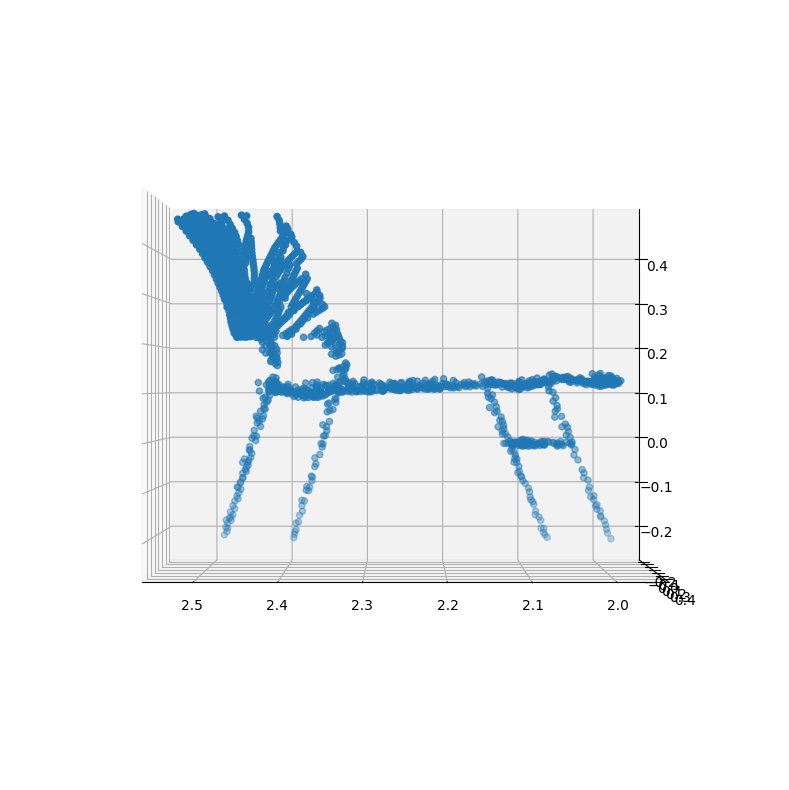

after plot
(1, 2048, 3)
predicting class
1/1 [==============================] - 0s 161ms/step
pred before argmax: [[0.32575068 0.18117052 0.01575018 0.10707415 0.008253   0.01656871
  0.25242385 0.05945808 0.0133499  0.02020095]]
[0]
<class 'numpy.ndarray'>
0


0

In [40]:
import tensorflow as tf

# formato original: <tf.Tensor: shape=(32, 2048, 3), dtype=float64, numpy=array
# formato: <tf.Tensor: shape=(8, 2048, 3), dtype=float64, numpy= array
# preds = model.predict(points)
# preds = tf.math.argmax(preds, -1)
# preds

print('my_point_cloud type:' + str(type(pcd)))
print('my_point_cloud type options:' + str(type(pcd.points)))

print("converting pointcloud")
#converted_pc=tf.convert_to_tensor(my_point_cloud.points)
# formato: tf.Tensor: shape=(2048, 3), dtype=float32, numpy=array
#converted_pc_3d = tf.expand_dims(converted_pc, axis=0)
#converted_pc_3d_2 = tf.cast(converted_pc_3d, dtype=tf.float64)
# formato tf.Tensor: shape=(1, 2048, 3), dtype=float32,
"""  x: Input samples. It could be:
              - A Numpy array (or array-like), or a list of arrays
                (in case the model has multiple inputs).
              - A TensorFlow tensor, or a list of tensors
                (in case the model has multiple inputs).
              - A `tf.data` dataset.
              - A generator or `keras.utils.Sequence` instance.
              A more detailed description of unpacking behavior for iterator
              types (Dataset, generator, Sequence) is given in the `Unpacking
              behavior for iterator-like inputs` section of `Model.fit`.
"""
pcd = pcd.farthest_point_down_sample(2048)
print('after sampling down')
#print_points(pcd)
points_np = numpy.asarray(pcd.points)
points_np[:, [-2, 1]] = points_np[:, [1, 2]]
pcd.points = o3d.utility.Vector3dVector(points_np)
print_points(pcd)
points_np = numpy.expand_dims(points_np, axis=0)  # Add a batch dimension
print(str(points_np.shape))
print('predicting class')
pred = model.predict(points_np)
print('pred before argmax: ' + str(pred))
pred = tf.math.argmax(pred, -1)
print(pred.numpy())
print(type(pred.numpy()))
print(pred.numpy()[0])
#print('pred after argmax: ' + pred.numpy())

# print("pred: {:}".format(classmap[pred.numpy()]))
# CLASS_MAP[preds[i].numpy()]
# formato: tf.Tensor: shape=(1,), dtype=int64, numpy=array([0]
pred.numpy()[0]

#  0: 'bed',
#  1: 'monitor',
#  2: 'desk',
#  3: 'chair',
#  4: 'dresser',
#  5: 'toilet',
#  6: 'sofa',
#  7: 'table',
#  8: 'night_stand',
#  9: 'bathtub'}


starting to plot
type: <class 'open3d.cpu.pybind.geometry.PointCloud'>
(2048, 3)


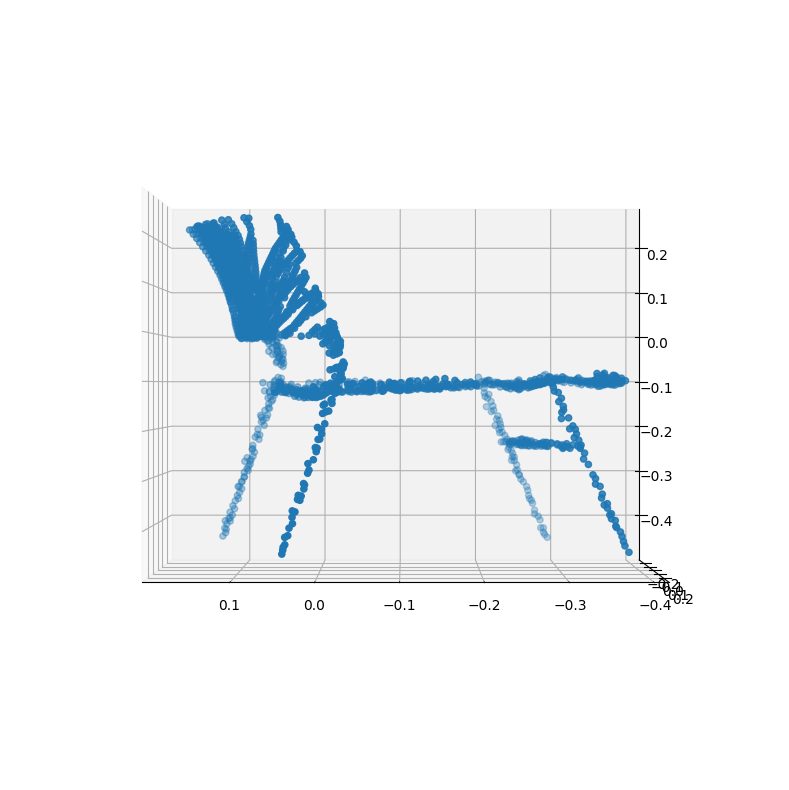

after plot
(1, 2048, 3)
predicting class
1/1 [==============================] - 0s 72ms/step
pred before argmax: [[0.3770319  0.1935165  0.01137095 0.10163907 0.00599841 0.01476457
  0.22823273 0.03974965 0.00897247 0.01872377]]
[0]
<class 'numpy.ndarray'>
0


In [14]:
pcd.get_center()
pcd_t = pcd.translate(-pcd.get_center())
print_points(pcd_t)

points_np = numpy.asarray(pcd_t.points)
points_np = numpy.expand_dims(points_np, axis=0)  # Add a batch dimension
print(str(points_np.shape))
print('predicting class')
pred = model.predict(points_np)
print('pred before argmax: ' + str(pred))
pred = tf.math.argmax(pred, -1)
print(pred.numpy())
print(type(pred.numpy()))
print(pred.numpy()[0])

TriangleMesh with 4182 points and 4230 triangles.
starting to plot
type: <class 'open3d.cpu.pybind.geometry.PointCloud'>
(2048, 3)


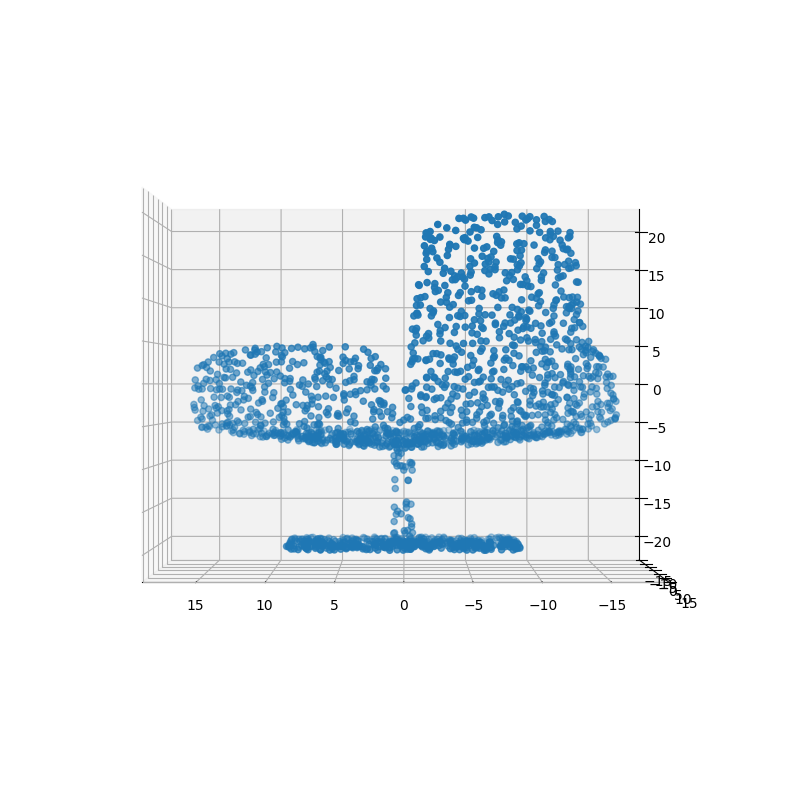

after plot
points_np.shape: (2048, 3)
(1, 2048, 3)
predicting class
1/1 [==============================] - 0s 102ms/step
pred before argmax: [[1.7836469e-04 1.5647773e-02 5.7471216e-06 9.6811479e-01 4.4220369e-04
  1.0483394e-02 4.8190966e-05 4.6844955e-04 4.6055685e-03 5.5454002e-06]]
[3]
<class 'numpy.ndarray'>
3


In [15]:
import tensorflow as tf
mesh = o3d.io.read_triangle_mesh("/Users/ielson/.keras/datasets/ModelNet10/chair/test/chair_0893.off")
print(mesh)
o3d.visualization.draw([mesh])
pcd = mesh.sample_points_uniformly(number_of_points=2048)

print_points(pcd)
points_np = numpy.asarray(pcd.points)
print("points_np.shape: " + str(points_np.shape))
points_np = numpy.expand_dims(points_np, axis=0)  # Add a batch dimension
print(str(points_np.shape))
print('predicting class')
pred = model.predict(points_np)
print('pred before argmax: ' + str(pred))
pred = tf.math.argmax(pred, -1)
print(pred.numpy())
print(type(pred.numpy()))
print(pred.numpy()[0])


starting to plot
(1, 41100, 3)


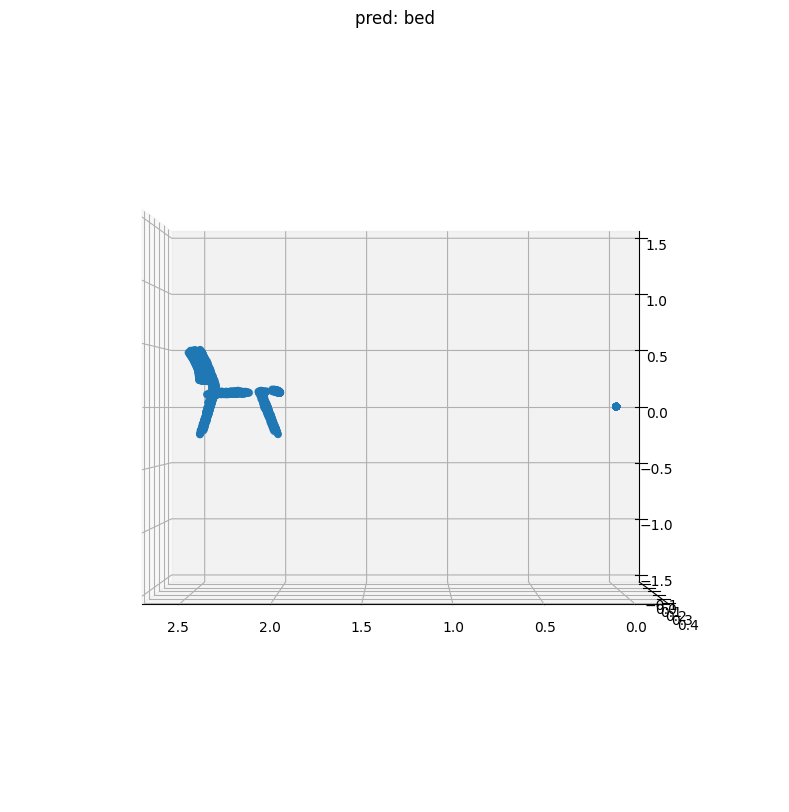

after plot


In [7]:
from matplotlib import pyplot as plt

print("starting to plot")
# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")
print(converted_pc_3d_2.shape)
ax.scatter(converted_pc_3d_2[0, :, 0], converted_pc_3d_2[0, :, 1], converted_pc_3d_2[0, :, 2])
ax.set_title("pred: {:}".format(classmap[pred[0].numpy()]))
ax.view_init(elev=0.,azim=90.)
ax.set_zlim(-1.5, 1.5)
#ax.set_axis_off()
plt.show()
print('after plot')

In [2]:
import open3d.core as o3c

pcd.get_center()
#pcd_down = pcd.farthest_point_down_sample(2048)
#print_points(pcd_down)

pcd_new_style = o3d.t.geometry.PointCloud.from_legacy(pcd)
print_points(pcd_new_style.to_legacy())

def display_inlier_outlier(cloud : o3d.t.geometry.PointCloud, mask : o3c.Tensor):
    inlier_cloud = cloud.select_by_mask(mask)
    outlier_cloud = cloud.select_by_mask(mask, invert=True)


    print("Showing outliers (red) and inliers (gray): ")
    outlier_cloud = outlier_cloud.paint_uniform_color([1.0, 0, 0])
    inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])
    inlier_cloud = o3d.visualization.draw([inlier_cloud.to_legacy(), outlier_cloud.to_legacy()])

print("Statistical oulier removal")
cl, ind = pcd_new_style.remove_radius_outliers(nb_points=16, search_radius=0.05)

#display_inlier_outlier(pcd_new_style, ind)
print_points(cl.to_legacy())
print(type(cl))
print(type(cl.to_legacy()))
#print(cl.point.shape)




NameError: name 'pcd' is not defined

1/1 [==============================] - 0s 56ms/step
starting to plot


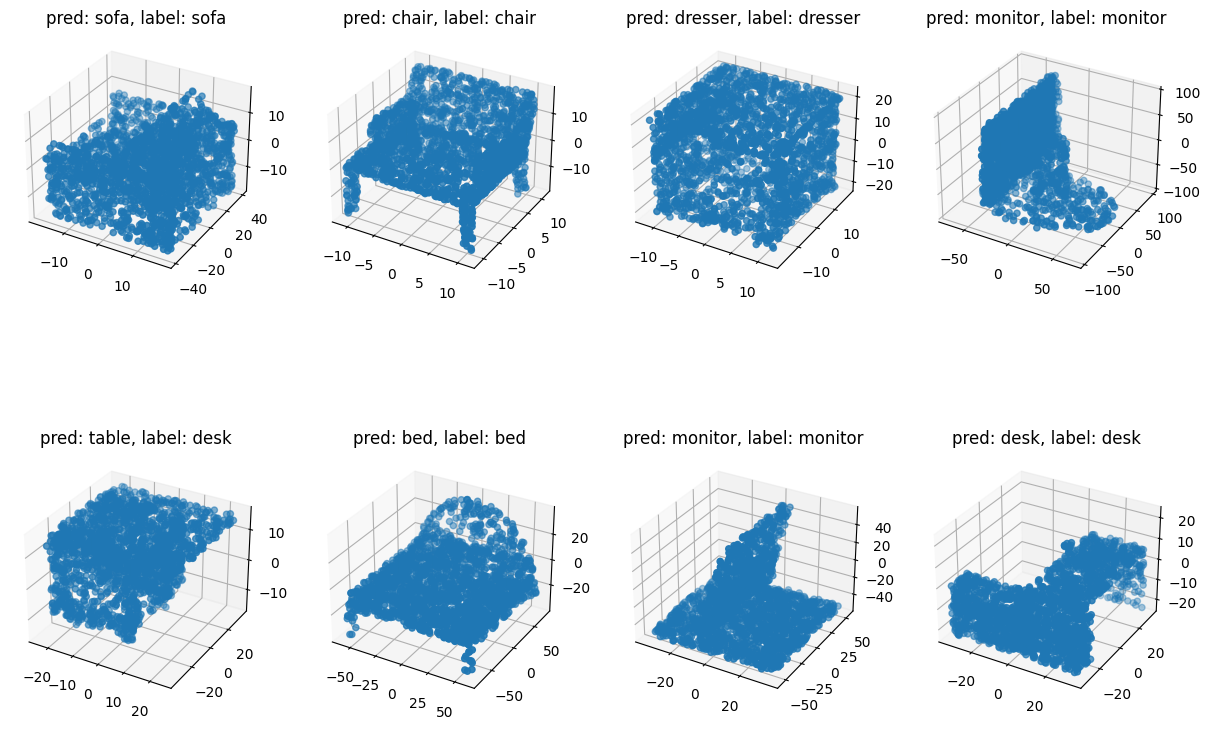

after plot


(<keras.engine.functional.Functional at 0x299125450>,
 {0: 'bed',
  1: 'monitor',
  2: 'desk',
  3: 'chair',
  4: 'dresser',
  5: 'toilet',
  6: 'sofa',
  7: 'table',
  8: 'night_stand',
  9: 'bathtub'})

In [8]:
pointnet_classification.test_trained_model(test_dataset, model, classmap)

points shape: (32, 2048, 3)
mypointCloud sample: (41100, 3)
type tensor: <class 'tensorflow.python.framework.ops.EagerTensor'>shape: <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(2048, 3), dtype=float32, numpy=
array([[ 0.        , -0.        ,  0.        ],
       [ 0.        , -0.        ,  0.        ],
       [ 2.447873  , -0.04633902,  0.34272775],
       ...,
       [ 0.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]], dtype=float32)>>


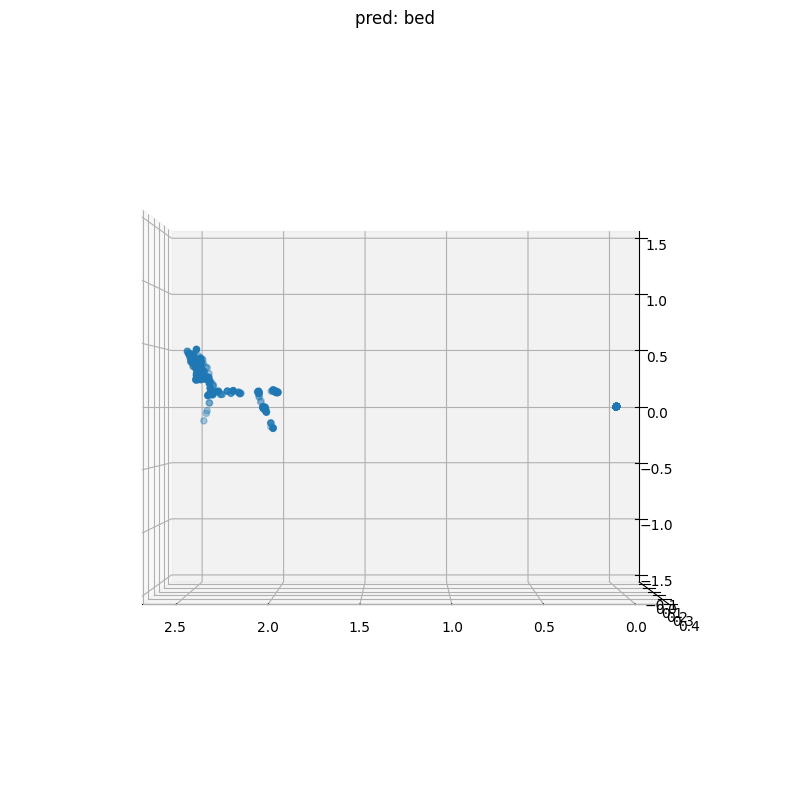

In [9]:
# Tests model
data = test_dataset.take(1)

points, labels = list(data)[0]
print('points shape: ' + str(points.shape))
print("mypointCloud sample: "+ str(my_point_cloud.points.shape) )
sampled_pc = my_point_cloud.get_sample('points_random', n=2048, as_PyntCloud=True)
converted_pc=tf.convert_to_tensor(sampled_pc.points)
print("type tensor: " + str(type(converted_pc))+ "shape: "+ str(converted_pc.get_shape))

pcnp = converted_pc.numpy()
fig1 = plt.figure(figsize=(15, 10))
ax1 = plt.axes(projection="3d")
ax1.scatter(pcnp[:, 0], pcnp[:, 1], pcnp[:, 2])
ax1.set_title("pred: {:}".format(classmap[pred[0].numpy()]))
ax1.view_init(elev=0.,azim=90.)
ax1.set_zlim(-1.5, 1.5)
#ax.set_axis_off()
plt.show()


# formato: tf.Tensor: shape=(2048, 3), dtype=float32, numpy=array
# converted_pc_3d = tf.expand_dims(converted_pc, axis=0)

# # points[0, :, :] = converted_pc_3d_2
# points = points[:8, ...]
# labels = labels[:8, ...]

# # Run test data through model
# preds = model.predict(points)
# print(type(preds))
# preds = tf.math.argmax(preds, -1)

# print("starting to plot")
# # plot points with predicted class and label
# fig = plt.figure(figsize=(15, 10))
# for i in range(8):
#     ax = fig.add_subplot(2, 4, i + 1, projection="3d")
#     ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
#     ax.set_title(
#         "pred: {:}, label: {:}".format(
#             classmap[preds[i].numpy()], classmap[labels.numpy()[i]]
#         )
#     )
#     ax.set_axis_off()
# plt.show()
# print('after plot')



In [10]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

print('type points: ' + (str(type(points))))

# Run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()

# meu print
print(preds.numpy())
print(type(preds.numpy()))
print(preds.numpy()[0])

points

type points: <class 'tensorflow.python.framework.ops.EagerTensor'>
1/1 [==============================] - 0s 55ms/step
[3 1 0 8 1 2 8 5]
<class 'numpy.ndarray'>
3


array([[[ 3.27163317e+00, -1.04239453e+01, -5.00000000e-05],
        [ 9.89012864e+00, -1.24015500e+01, -1.43029663e+01],
        [-9.18283879e+00, -1.04330470e+01, -6.13194650e+00],
        ...,
        [-8.85825000e+00, -6.97011261e+00,  2.80988708e+00],
        [-4.07357260e+00,  8.42603854e+00,  1.42877569e+01],
        [-4.54123237e+00,  6.16173329e+00,  1.96845000e+00]],

       [[-7.64684296e-01, -3.18830000e+00, -7.81217889e+00],
        [-8.64245103e+00, -3.38043660e+00, -7.53149000e+00],
        [ 6.95742461e+00, -6.38904694e+00, -7.54996343e+00],
        ...,
        [-6.93195394e+00,  3.92392382e+00, -8.16141000e+00],
        [-1.19357552e+00,  7.17098092e+00, -7.53149000e+00],
        [ 7.91275240e-01,  4.20212926e+00, -8.16141000e+00]],

       [[ 9.91773201e+00,  1.58536227e+01,  1.35084787e+00],
        [ 1.20172067e+01, -4.05785516e+01, -5.66928200e+00],
        [-8.73318815e+00, -3.48314100e+00, -9.44872000e-01],
        ...,
        [ 1.20871794e+01, -1.74110093e+00,

In [ ]:
def convertCloudFromRosToOpen3d(ros_cloud):
    
    # Get cloud data from ros_cloud
    field_names=[field.name for field in ros_cloud.fields]
    cloud_data = list(pc2.read_points(ros_cloud, skip_nans=True, field_names = field_names))

    # Check empty
    open3d_cloud = open3d.PointCloud()
    if len(cloud_data)==0:
        print("Converting an empty cloud")
        return None

    # Set open3d_cloud
    if "rgb" in field_names:
        IDX_RGB_IN_FIELD=3 # x, y, z, rgb
        
        # Get xyz
        xyz = [(x,y,z) for x,y,z,rgb in cloud_data ] # (why cannot put this line below rgb?)

        # Get rgb
        # Check whether int or float
        if type(cloud_data[0][IDX_RGB_IN_FIELD])==float: # if float (from pcl::toROSMsg)
            rgb = [convert_rgbFloat_to_tuple(rgb) for x,y,z,rgb in cloud_data ]
        else:
            rgb = [convert_rgbUint32_to_tuple(rgb) for x,y,z,rgb in cloud_data ]

        # combine
        open3d_cloud.points = open3d.Vector3dVector(np.array(xyz))
        open3d_cloud.colors = open3d.Vector3dVector(np.array(rgb)/255.0)
    else:
        xyz = [(x,y,z) for x,y,z in cloud_data ] # get xyz
        open3d_cloud.points = open3d.Vector3dVector(np.array(xyz))

    # return
    return open3d_cloud